In [1]:
import networkx as nx

有向图

In [2]:
G=nx.DiGraph()

In [3]:
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

In [4]:
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [5]:
G.nodes()

NodeView(('Alice', 'Bob', 'Chuck'))

In [6]:
G.add_edge('Alice','Bob')
G.add_edge('Alice','Chuck')
G.add_edge('Bob','Alice')
G.add_edge('Bob','Chuck')

In [7]:
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

In [8]:
nx.draw_networkx??

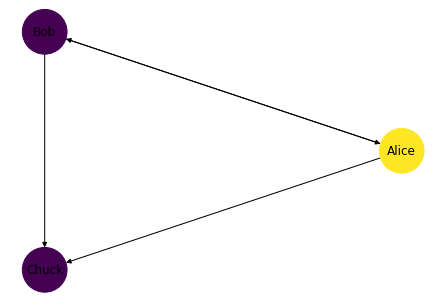

In [9]:
nx.draw_circular(G,node_color=(1,0,0),node_size=2000,with_labels=True)

In [10]:
positions=dict(Albany=(-74,43),Boston=(-71,42),NYC=(-74,41),Philly=(-75,40))

无向图

In [11]:
G=nx.Graph()

In [12]:
G.add_nodes_from(positions)

In [13]:
list(G.nodes())

['Albany', 'Boston', 'NYC', 'Philly']

In [14]:
drive_times={('Albany','Boston'):3,
            ('Albany','NYC'):4,
            ('Boston','NYC'):4,
            ('NYC','Philly'):2}

In [15]:
G.add_edges_from(drive_times)

draw函数只是把position和边画出来
draw_networkx_edge_labels把label画出来
所以两句要在一个cell中用

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

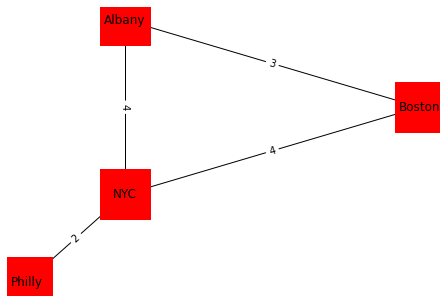

In [16]:
nx.draw(G,positions,node_color=(1,0,0),node_shape='s',node_size=2500,with_labels=True)
nx.draw_networkx_edge_labels(G,positions,edge_labels=drive_times)

enumerate生成的东西 第一个是序号 从0开始

In [17]:
nodes=range(10)
#nodes=[2,4,6,8]
for i,u in enumerate(nodes):
    print(i,u)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


生成完全图

In [18]:
def all_pairs(nodes):
    for i,u in enumerate(nodes):
        for j,v in enumerate(nodes):
            if i>j:
                yield u,v

In [19]:
def make_complete_graph(n):
    G=nx.Graph()
    nodes=range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [20]:
complete=make_complete_graph(10)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


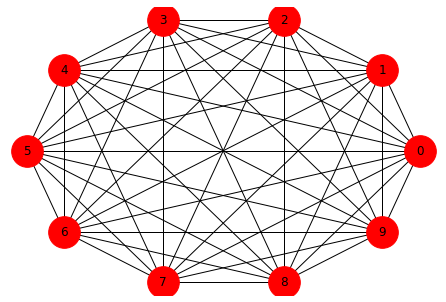

In [21]:
nx.draw_circular(complete,node_color=[1,0,0],node_size=1000,with_labels=True)

In [22]:
list(complete.neighbors(1))

[0, 2, 3, 4, 5, 6, 7, 8, 9]

在图G中找出start点所有可能的路径

In [23]:
def reachable_nodes(G,start):
    seen=set()
    stack=[start]
    while stack:
        node=stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [24]:
reachable_nodes(complete,0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

检查是否是联通图
只要有一个点可以遍历其它所有的点 那么就是联通图

In [25]:
def is_connected(G):
    start=next(iter(G))
    reachable=reachable_nodes(G,start)
    return len(reachable)==len(G)

In [26]:
is_connected(complete)

True

生成ER图 即G(n,p) p是概率

In [27]:
import numpy as np

In [28]:
def flip(p):
    return np.random.random() < p

In [29]:
def random_pairs(nodes,p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [30]:
def make_random_graph(n,p):
    G=nx.Graph()
    nodes=range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes,p))
    return G

In [36]:
random_graph=make_random_graph(10,0.2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


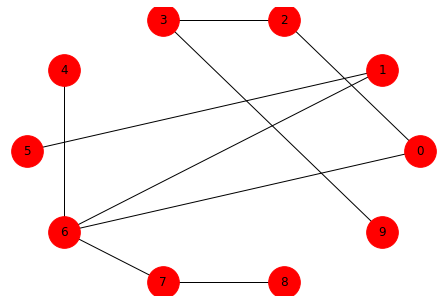

In [37]:
nx.draw_circular(random_graph,node_color=[1,0,0],node_size=1000,with_labels=True)

In [38]:
len(random_graph.edges())

9

In [39]:
len(complete.edges())

45

In [40]:
is_connected(random_graph)

True